## Color Mappings

In [1]:
import cv2
import matplotlib.pyplot as plt


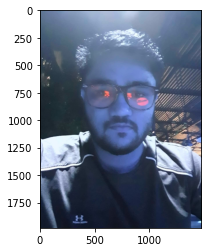

In [7]:
img  = cv2.imread('rafsan.jpg')
plt.imshow(img)

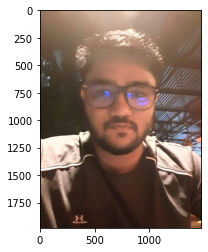

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

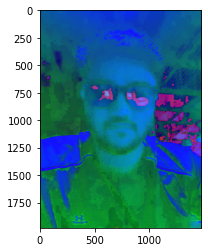

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)

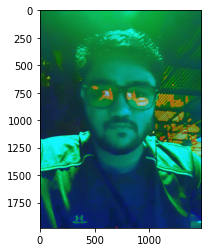

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.imshow(img)

## Blending and Pasting Images

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
img1 = cv2.imread('rafsan.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


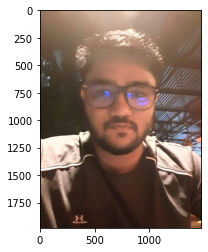

In [14]:
plt.imshow(img1);

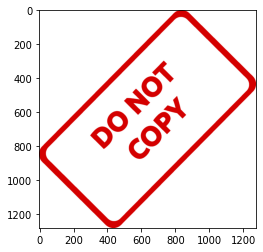

In [15]:
plt.imshow(img2);

In [16]:
img1.shape

(1980, 1472, 3)

In [17]:
img2.shape

(1280, 1277, 3)

In [18]:
# BLENDING IMAGES OF THE SAME SIZE
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

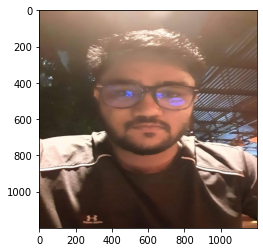

In [19]:
plt.imshow(img1)

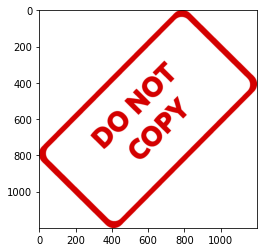

In [20]:
plt.imshow(img2)

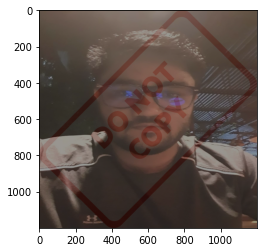

In [25]:
blended = cv2.addWeighted(src1=img1, alpha=0.5,
src2=img2, beta=0.1, gamma=0)
plt.imshow(blended)

In [26]:
# Overlay small image on top of a larger image (no blending)
# Numpy reassignment

In [28]:
img1 = cv2.imread('rafsan.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


In [29]:
img2 = cv2.resize(img2, (600, 600))

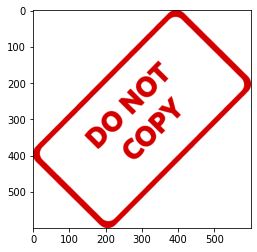

In [30]:
plt.imshow(img2)

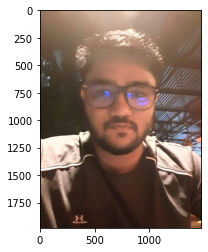

In [31]:
plt.imshow(img1)

In [32]:
large_img = img1
small_img = img2

In [33]:
x_offset = 0
y_offset = 0

In [35]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [36]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

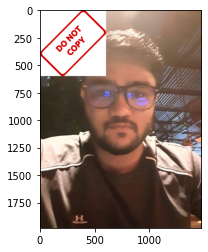

In [38]:
plt.imshow(large_img)

In [ ]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
img1 = cv2.imread('rafsan.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


In [3]:
img2 = cv2.resize(img2, (600, 600))

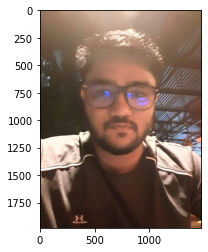

In [4]:
plt.imshow(img1)

In [5]:
img1.shape

(1980, 1472, 3)

In [6]:
x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600

In [31]:
x_offset

872

In [32]:
y_offset

1380

In [7]:
img2.shape

(600, 600, 3)

In [8]:
rows, cols, channels = img2.shape

In [9]:
rows

600

In [10]:
cols

600

In [29]:
img1.shape

(1980, 1472, 3)

In [34]:
img1.shape[0]

1980

In [35]:
x_offset

872

In [36]:
y_offset

1380

In [37]:
img1.shape[1]

1472

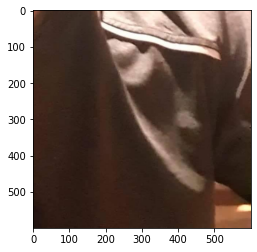

In [38]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]

plt.imshow(roi)

In [12]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

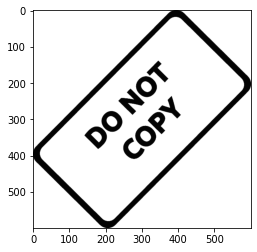

In [13]:
plt.imshow(img2gray, cmap='gray')

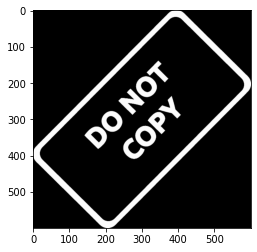

In [15]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

In [16]:
mask_inv.shape

(600, 600)

In [18]:
import numpy as np

In [19]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
white_background.shape

(600, 600, 3)

In [20]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [21]:
bk.shape

(600, 600, 3)

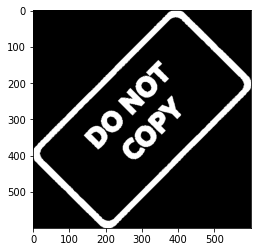

In [22]:
plt.imshow(bk)

In [25]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

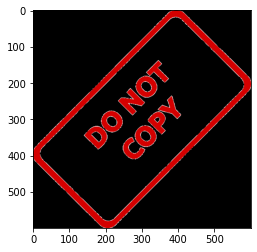

In [26]:
plt.imshow(fg)

In [39]:
final_roi = cv2.bitwise_or(roi, fg)

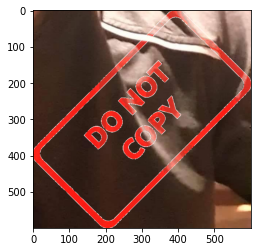

In [40]:
plt.imshow(final_roi)

In [41]:
large_img = img1
small_img = final_roi

In [42]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

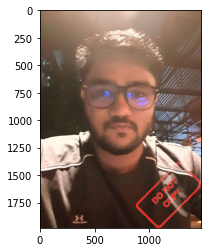

In [43]:
plt.imshow(large_img)